In [7]:
import qdpm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
def phase_sweep(phi, A, psi, C):
    return A*np.cos(phi+psi)+C

In [44]:
exp_on = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\TAG phase calib\Q2_20MHz\XPi\2021_03_02_13_43_36_on')
exp_off = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\TAG phase calib\Q2_20MHz\XPiO2\2021_02_25_19_22_47_off')

In [45]:
qubit_idx = 0

In [46]:
phi = np.linspace(0, 2*np.pi, exp_on.scan_size[0])

In [47]:
clf_on = qdpm.SingleQubitClassifier(exp_on, qubit=qubit_idx)
prediction_on = clf_on.predict()
population_on = 1-prediction_on.mean(axis=1)
clf_off = qdpm.SingleQubitClassifier(exp_off, qubit=qubit_idx)
prediction_off = clf_off.predict()
population_off = 1-prediction_off.mean(axis=1)

In [48]:
initial_guess = [0.5, -0.3, 0.5]
popt_on, pcov_on = curve_fit(phase_sweep, phi, population_on, p0=initial_guess)
popt_off, pcov_off = curve_fit(phase_sweep, phi, population_off, p0=initial_guess)

In [49]:
phase_compensation = popt_off[1]-popt_on[1]
print(phase_compensation)

0.39863684774513675


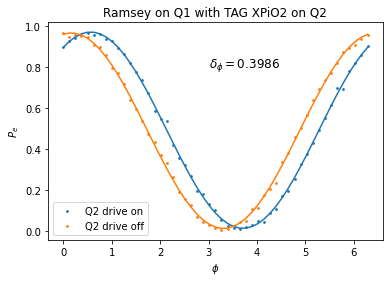

In [50]:
fig, ax = plt.subplots()
ax.scatter(phi, population_on, label='Q2 drive on', s=3)
ax.scatter(phi, population_off, label='Q2 drive off', s=3)
ax.plot(phi, phase_sweep(phi, *popt_on))
ax.plot(phi, phase_sweep(phi, *popt_off))
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$P_e$')
ax.legend()
ax.set_title(r'Ramsey on Q1 with TAG XPiO2 on Q2')
ax.annotate(r'$\delta_\phi={0:.4f}$'.format(phase_compensation), xy=(3, 0.8), size=12)
fig.savefig(exp_on.path.parent.joinpath('comparison.png'))
plt.show()